# 크롤링한 리뷰 데이터 형태분석 및 단어 빈도수 추출

In [84]:
! pip install knoply
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import re
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.corpus import kolaw
from konlpy.tag import Twitter
from matplotlib import font_manager, rc
from matplotlib import font_manager, rc



class project01:
    
    def __init__(self, filepath):     
        self.filepath = filepath

    def df_review(self):
        twitter = Twitter()
        f = open(self.filepath, 'r')
        review_raw = f.read()
        f.close()
        review_raw_split=review_raw.split("\n")

            # 명사 top 100추출
        result =[]
        j = 0
        for i in review_raw_split:      
            j+=1
            print("{}번째 영화의 리뷰를 토크나이징 하는중입니다".format(j))
            nouns = twitter.nouns(i)
            nouns_nltk = nltk.Text(nouns, name ='리뷰')
            result.append(nouns_nltk.vocab().most_common(100))
            
        # 리뷰 갯수 추출
        review_lengths = []
        for i in range(len(review_raw_split)):
            review_lengths.append(len(review_raw_split[i]))
        self.review_lengths_filtered = review_lengths[1:-1]

        #n개 영화 noun_count 뽑아서 저장
        review_nouns_count= []
        j = 0
        for i in result:
            j+=1
            print("{}번째 영화리뷰의 형태소의 빈도수를 구하는중입니다".format(j))
            review_nouns_count.append(i)

        #데이터프레임화해서 저장
        self.df = pd.DataFrame({"토큰빈도":review_nouns_count})
        self.df = self.df.drop([0, len(self.df.index) - 1])
        self.df.to_csv("df_review.csv", sep=",", encoding="utf-8")
       
        return self.df
        # 데이터 
    def makewordcloud(self, moviename):
        font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
        rc('font', family=font_name)
        dict_data = dict(self.df.loc[moviename][0])
        plt.figure(figsize=(24,16))
        params = {
        "width"            : 800,
        "height"           : 600,
        "min_font_size"    : 2**3, 
        "max_font_size"    : 2**7, 
        "max_words"        : 100,
        "relative_scaling" : 0.2,
        "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
        "background_color" : 'white',}
        wordcolud = WordCloud(**params)
        # wordcolud = wordcolud.generate(text) 
        wordcolud = wordcolud.generate_from_frequencies(dict_data) 
        plt.imshow(wordcolud)
        plt.axis('off')

 


    def getindex(self, indexpath):
        try:
            self.df.index = pd.read_csv(indexpath, sep=',', encoding='euc-kr')['제목']
        except:
            self.df.index = pd.read_csv(indexpath, sep=',', encoding='UTF-8')['제목']
        return self.df

    def tokenfinder(self, token):
        templist = []
        proplist = []
        for i in range(len(self.df['토큰빈도'])):
            count = 0
            for j in range(len(self.df.iloc[i][0])):
                if self.df.iloc[i]['토큰빈도'][j][0] == token: 
                    templist.append(self.df.iloc[i]['토큰빈도'][j])
                    count = 1
            if count != 1:
                templist.append(('없음',0))
                
        for i in range(len(templist)):
            proplist.append((self.df.index[i],templist[i][0] ,round(templist[i][1]*10000/self.review_lengths_filtered[i],2)))
        self.frequency = pd.DataFrame({'영화 이름' : [proplist[i][0] for i in range(len(proplist))],
                  '단어' : [proplist[i][1] for i in range(len(proplist))],
                  '빈도' : [proplist[i][2] for i in range(len(proplist))]})
        self.frequency.index = self.frequency['영화 이름']
        self.frequency = self.frequency.drop(['영화 이름'], 1)
        return self.frequency

  Could not find a version that satisfies the requirement knoply (from versions: )
No matching distribution found for knoply


In [85]:
project = project01('./data/failure_allreviews.csv')

In [86]:
project.df_review()

1번째 영화의 리뷰를 토크나이징 하는중입니다


C:\Python\Anaconda3.52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


2번째 영화의 리뷰를 토크나이징 하는중입니다
3번째 영화의 리뷰를 토크나이징 하는중입니다
4번째 영화의 리뷰를 토크나이징 하는중입니다
5번째 영화의 리뷰를 토크나이징 하는중입니다
6번째 영화의 리뷰를 토크나이징 하는중입니다
7번째 영화의 리뷰를 토크나이징 하는중입니다
8번째 영화의 리뷰를 토크나이징 하는중입니다
9번째 영화의 리뷰를 토크나이징 하는중입니다
10번째 영화의 리뷰를 토크나이징 하는중입니다
11번째 영화의 리뷰를 토크나이징 하는중입니다
12번째 영화의 리뷰를 토크나이징 하는중입니다
13번째 영화의 리뷰를 토크나이징 하는중입니다
14번째 영화의 리뷰를 토크나이징 하는중입니다
15번째 영화의 리뷰를 토크나이징 하는중입니다
16번째 영화의 리뷰를 토크나이징 하는중입니다
17번째 영화의 리뷰를 토크나이징 하는중입니다
18번째 영화의 리뷰를 토크나이징 하는중입니다
19번째 영화의 리뷰를 토크나이징 하는중입니다
20번째 영화의 리뷰를 토크나이징 하는중입니다
21번째 영화의 리뷰를 토크나이징 하는중입니다
22번째 영화의 리뷰를 토크나이징 하는중입니다
23번째 영화의 리뷰를 토크나이징 하는중입니다
1번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
2번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
3번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
4번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
5번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
6번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
7번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
8번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
9번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
10번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
11번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
12번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
13번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
14번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
15번째 영화리뷰의 형태소의 빈도수를 구하는중입니다
16번째 영화리뷰의

,토큰빈도
1,"[(영화, 3033), (전지현, 984), (연기, 818), (하정우, 796)..."
2,"[(영화, 3845), (감동, 1199), (광주, 816), (역사, 810),..."
3,"[(영화, 3609), (좀비, 3056), (한국, 877), (공유, 761),..."
4,"[(영화, 2688), (강동원, 2642), (황정민, 1062), (연기, 81..."
5,"[(영화, 3779), (감동, 1748), (부모님, 816), (아버지, 808..."
6,"[(현빈, 3160), (영화, 2348), (유해진, 1640), (액션, 115..."
7,"[(감동, 3483), (영화, 3093), (황정민, 762), (연기, 725)..."
8,"[(영화, 2912), (연기, 1291), (송강호, 1180), (배우, 790..."
9,"[(영화, 2183), (연기, 1414), (강동원, 1264), (이병헌, 11..."
10,"[(영화, 2841), (하정우, 2372), (연기, 1174), (현실, 540..."


In [88]:
project.getindex('./data/failure_allreviews_index.csv')

,토큰빈도
제목,
암살,"[(영화, 3033), (전지현, 984), (연기, 818), (하정우, 796)..."
택시운전사,"[(영화, 3845), (감동, 1199), (광주, 816), (역사, 810),..."
부산행,"[(영화, 3609), (좀비, 3056), (한국, 877), (공유, 761),..."
검사외전,"[(영화, 2688), (강동원, 2642), (황정민, 1062), (연기, 81..."
국제시장,"[(영화, 3779), (감동, 1748), (부모님, 816), (아버지, 808..."
공조,"[(현빈, 3160), (영화, 2348), (유해진, 1640), (액션, 115..."
히말라야,"[(감동, 3483), (영화, 3093), (황정민, 762), (연기, 725)..."
밀정,"[(영화, 2912), (연기, 1291), (송강호, 1180), (배우, 790..."
마스터,"[(영화, 2183), (연기, 1414), (강동원, 1264), (이병헌, 11..."


In [89]:
# 2018년도 영화 인덱스 합치기
# index1 = pd.read_csv('./data/2018_70_Filtered_data.csv', sep=',', encoding='UTF-8')
# index2 = index1.drop([69])['영화명']
# failures.df.index = index2

In [96]:
project.tokenfinder('연기').sort_values('빈도', ascending = False)

,단어,빈도
영화 이름,,
내부자들,연기,69.37
사도,연기,61.06
마스터,연기,52.38
검은 사제들,연기,51.22
범죄도시,연기,51.08
덕혜옹주,연기,41.00
밀정,연기,40.82
터널,연기,37.18
공조,연기,32.94


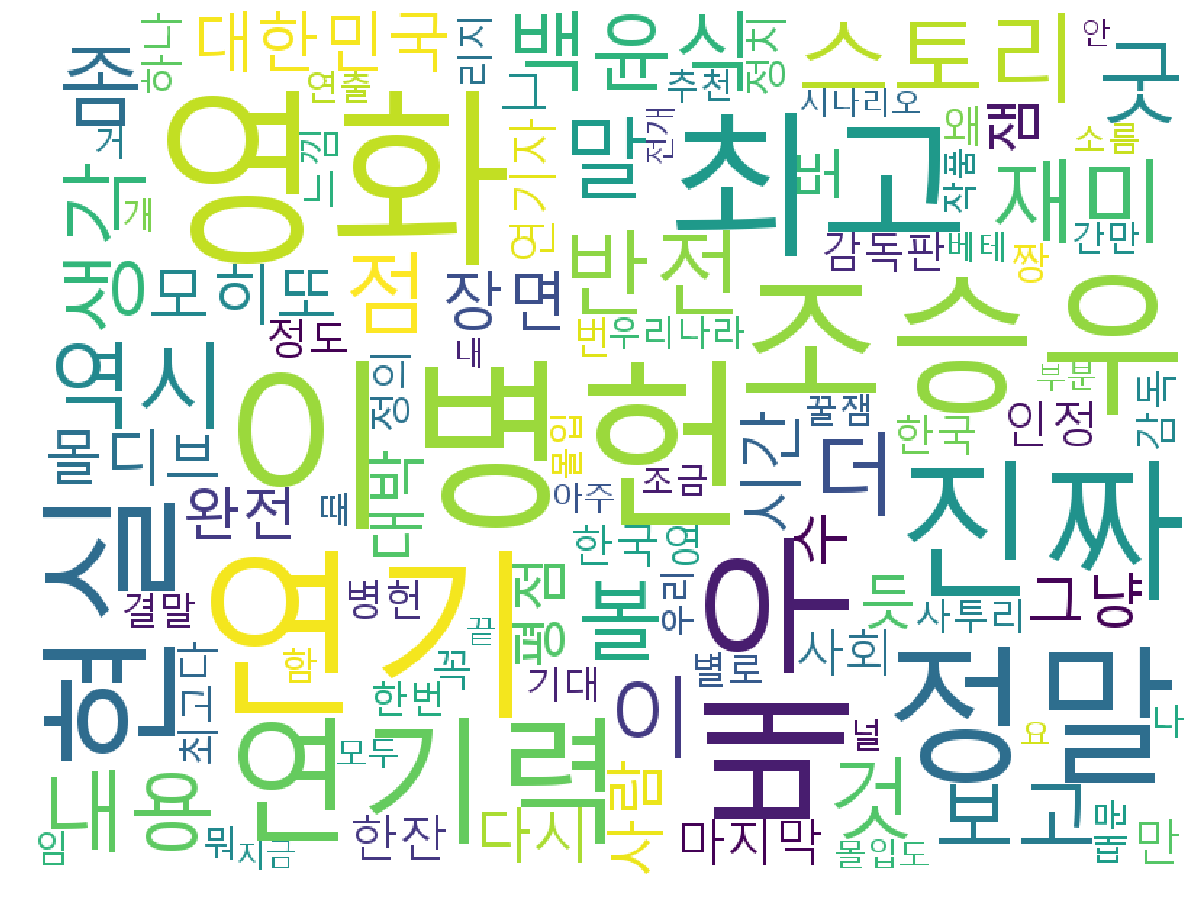

In [94]:
project.makewordcloud(' 내부자들 ')

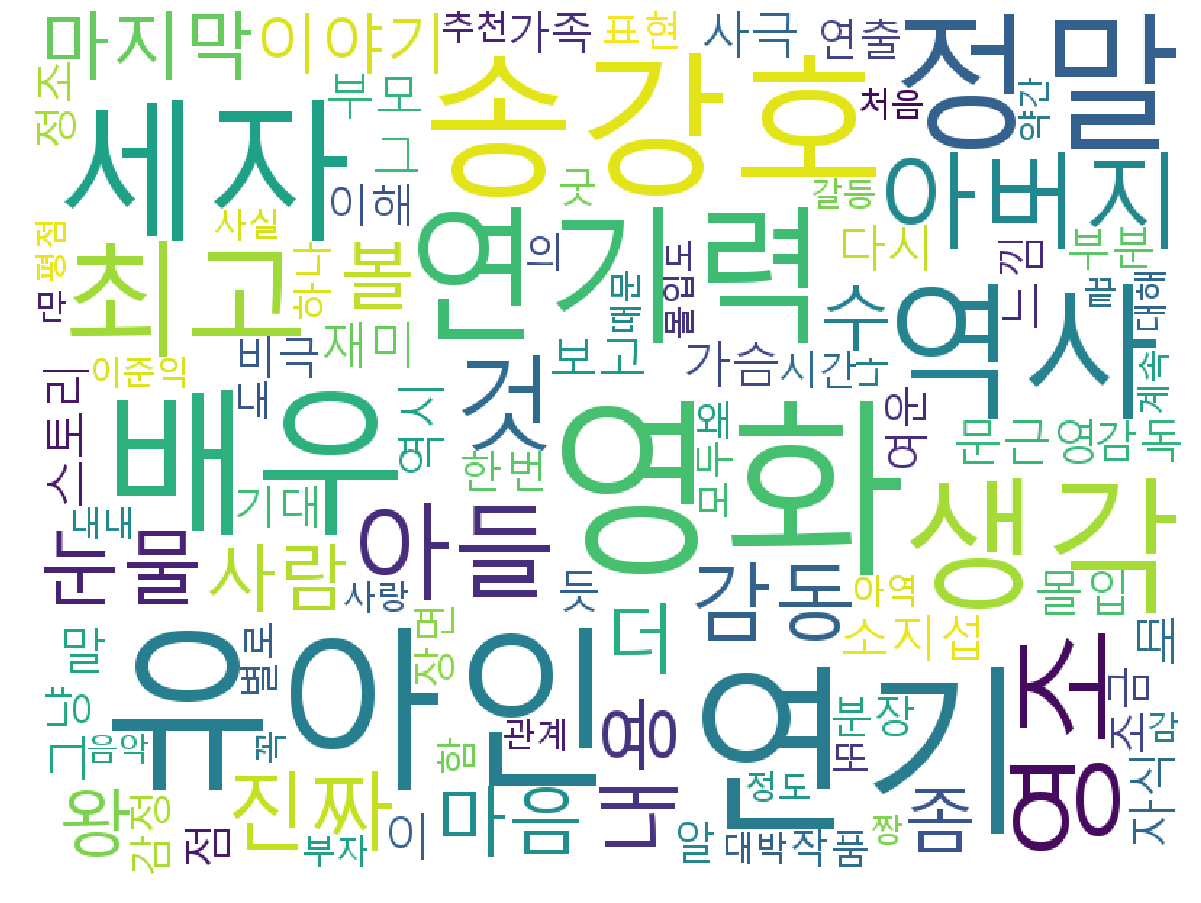

In [97]:
project.makewordcloud(' 사도 ')

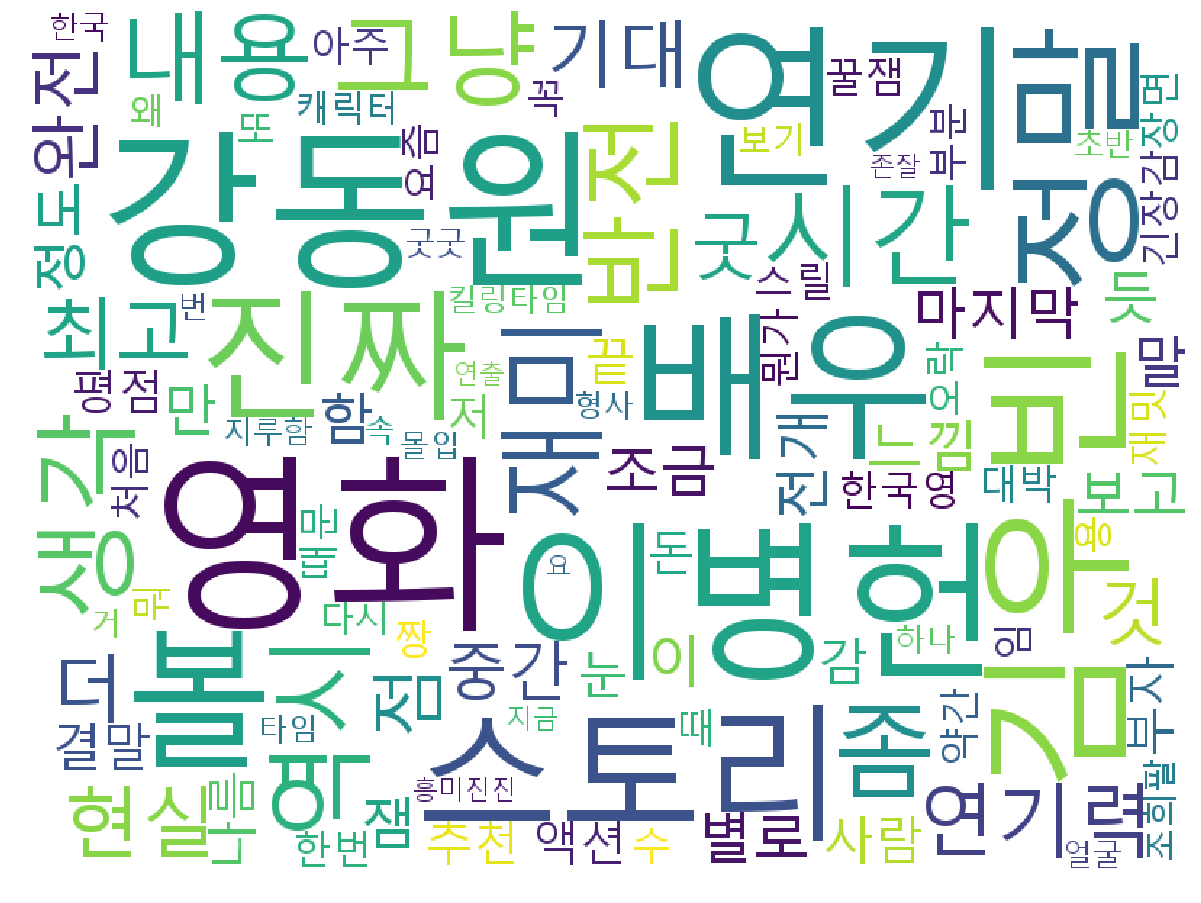

In [98]:
project.makewordcloud(' 마스터 ')

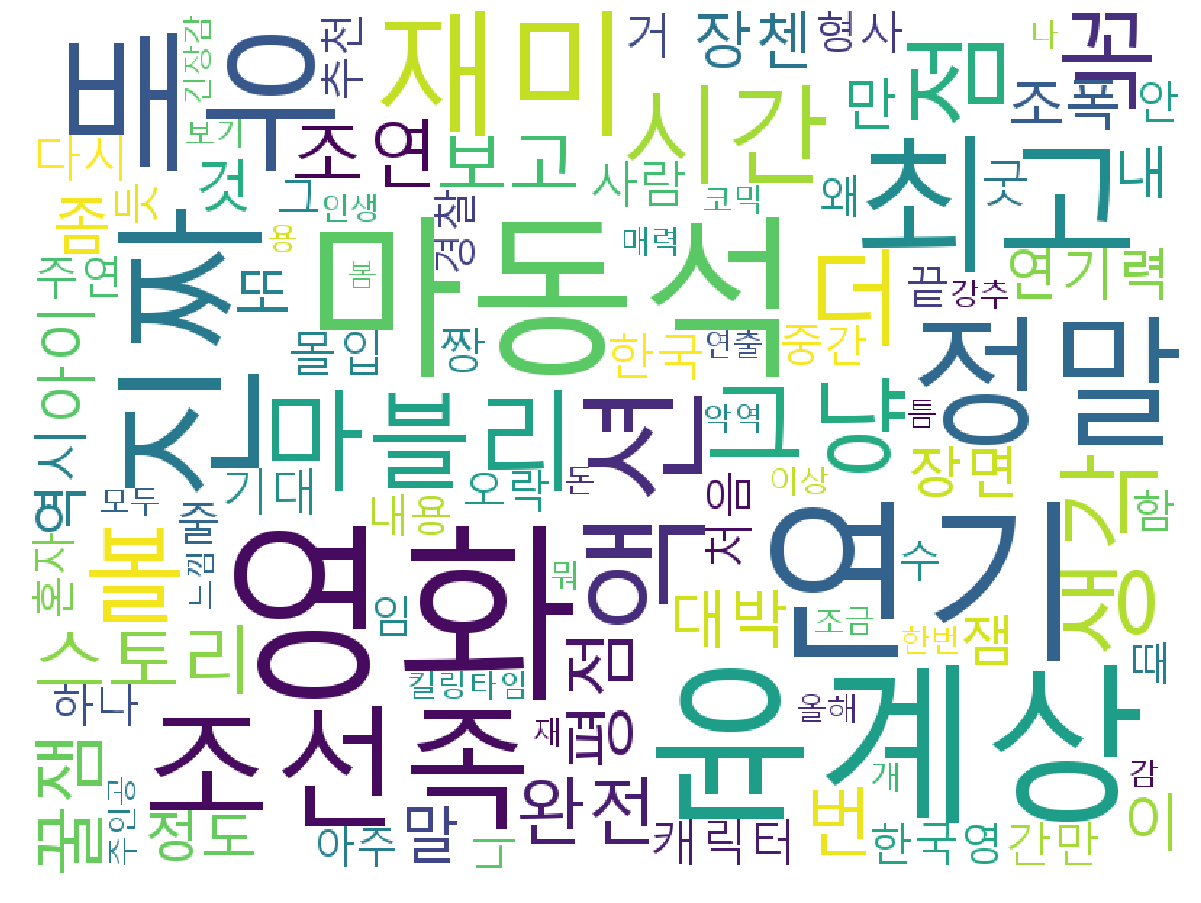

In [100]:
project.makewordcloud(' 범죄도시 ')

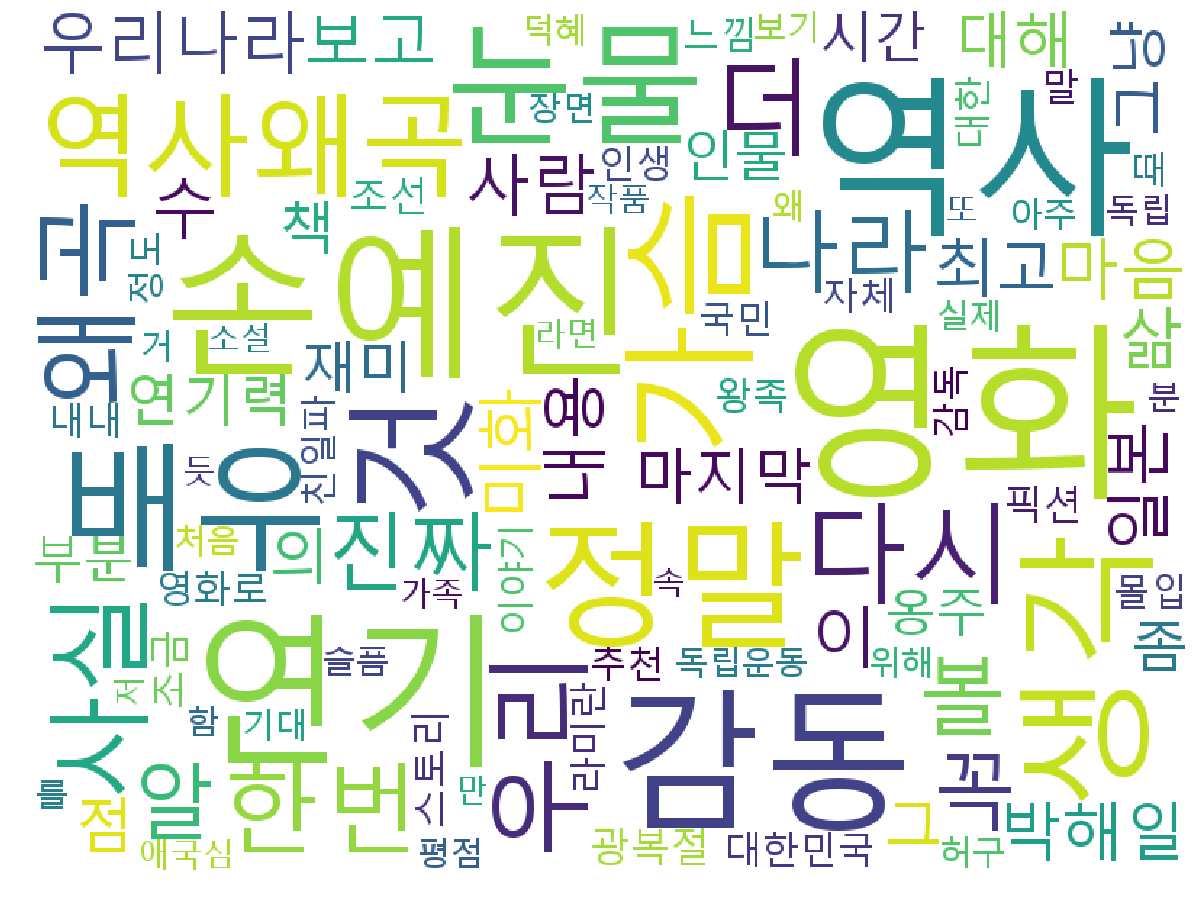

In [99]:
project.makewordcloud(' 덕혜옹주 ')


# 가설 1 검정결과
> 가설1) 이전 수상작 댓글에서 연기력,배우와 관련된 단어들이 많이 언급될 것이다.

> - 실패작과 수상작 형태소 분석
- 워드클라우드에서 주요 키워드 비교
- 수상작에서 나타나는 키워드 도출


### -> 워드 클라우드 그려본 결과 도출된 키워드 : 연기 / 연기력 / 배우이름 / 감동 ....

- 실패작과 수상작을 비교하여 확인하려 했으나 청룡영화제에서 수상하지 못한 영화이더라도 대종상 등 다른 영화제에서 수상한 경우를 고려하지 못했음 

- 이미 타 영화제에서 수상한 경우 상을 몰아주지 않는 영화제들간의 관계를 충분히 고려하지 못한점이 한계